# Explore here

In [2]:
# Import Packages
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

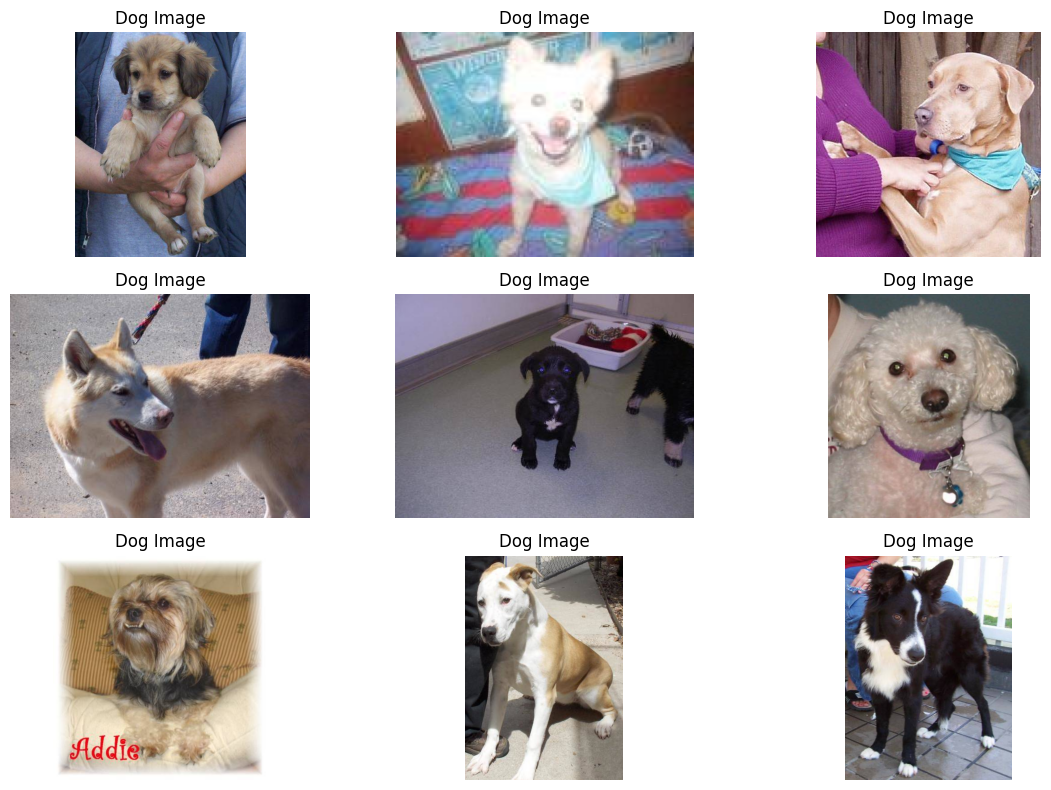

In [3]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to the directory containing your image data
data_dir = "../data/raw/dogs-vs-cats/train/"

# Check if the data directory exists and print its contents
if not os.path.exists(data_dir):
    print(f"The specified directory '{data_dir}' does not exist.")
else:
    # Get a list of all image file names in the train folder
    image_files = os.listdir(data_dir)

    # Filter the list to include only dog images (assuming they contain 'dog' in their filename)
    dog_image_files = [f for f in image_files if 'dog' in f]

    if len(dog_image_files) == 0:
        print("No dog images found in the specified directory.")
    else:
        # Load the first nine dog images
        dog_images = []
        for i in range(9):
            img_path = os.path.join(data_dir, dog_image_files[i])
            img = image.load_img(img_path)  # Adjust target_size as needed
            img_array = image.img_to_array(img)
            img_array /= 255.0  # Normalize pixel values to [0, 1]
            dog_images.append(img_array)

        # Create a single figure to display all nine images
        plt.figure(figsize=(12, 8))

        for i in range(9):
            plt.subplot(3, 3, i + 1)
            plt.imshow(dog_images[i])
            plt.title('Dog Image')
            plt.axis('off')

        # Adjust Layout
        plt.tight_layout()

        # Show the pictures
        plt.show()


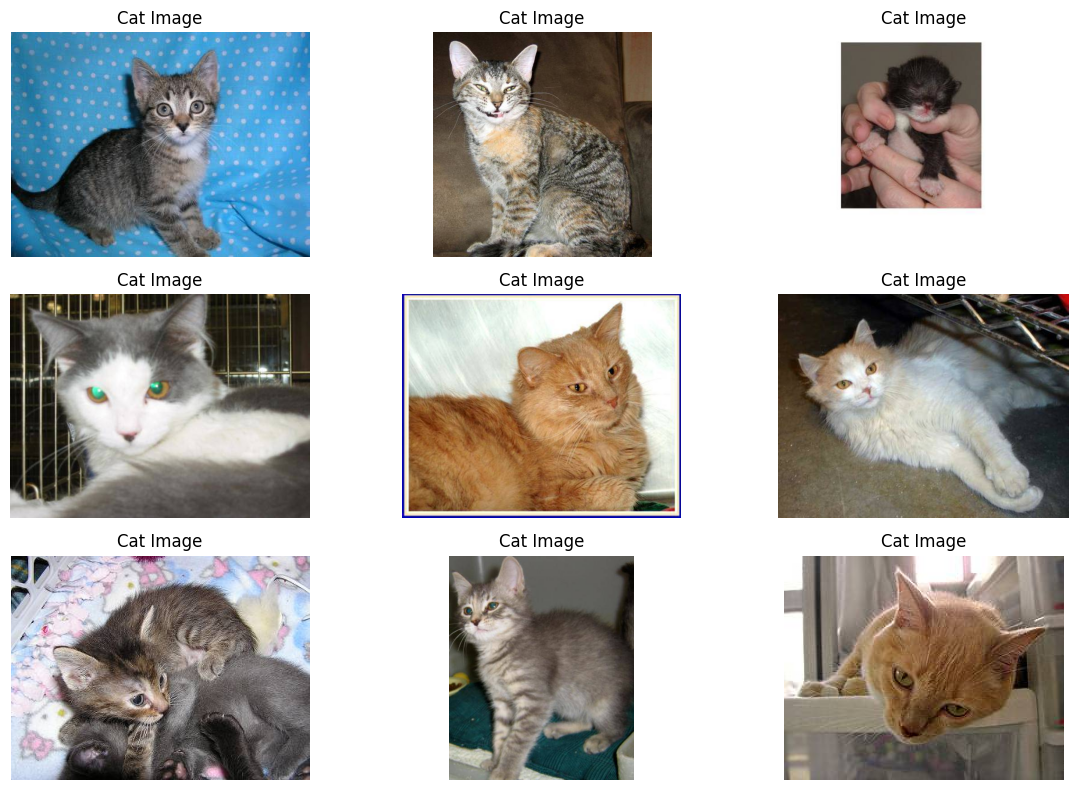

In [4]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to the directory containing your image data
data_dir = "../data/raw/dogs-vs-cats/train/"

# Get a list of all image file names in the train folder
image_files = os.listdir(data_dir)

# Filter the list to include only cat images (assuming they contain 'cat' in their filename)
cats_image_files = [f for f in image_files if 'cat' in f]

if len(cats_image_files) == 0:
    print("No cat images found in the specified directory.")
else:
    # Load the first nine cat images
    cats_images = []
    for i in range(min(9, len(cats_image_files))):  # Limit to available cat images
        img_path = os.path.join(data_dir, cats_image_files[i])
        img = image.load_img(img_path)  # Adjust target_size if necessary
        img_array = image.img_to_array(img)
        img_array /= 255.0  # Normalize pixel values to [0, 1]
        cats_images.append(img_array)

    # Create a single figure to display all cat images
    plt.figure(figsize=(12, 8))

    for i in range(len(cats_images)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(cats_images[i])
        plt.title('Cat Image')
        plt.axis('off')

    # Adjust Layout
    plt.tight_layout()

    # Show the pictures
    plt.show()


In [5]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the directory containing your image data
data_dir = "../data/raw/dogs-vs-cats/train/"

# Create a DataFrame with filenames and labels
image_files = os.listdir(data_dir)
labels = ['cat' if 'cat' in filename else 'dog' for filename in image_files]

df = pd.DataFrame({
    'filename': image_files,
    'class': labels
})

# Define image size
image_size = (200, 200)

# Create DataGenerators for training and testing datasets
datagentrain = ImageDataGenerator(rescale=1./255)

# Training Data Generation using flow_from_dataframe
train_data = datagentrain.flow_from_dataframe(
    dataframe=df,
    directory=data_dir,
    x_col="filename",
    y_col="class",
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    shuffle=True
)



NameError: name 'pd' is not defined

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the Model using Adam 
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [8]:
model = Sequential()
model.add(Conv2D(input_shape=(200, 200, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
# Continue with the rest of the layers...


In [56]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

# Define the model
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(input_shape=(200, 200, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten the output from the convolutional layers before passing it to the dense layers
model.add(Flatten())

# Add fully connected (dense) layers
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))  # For binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, epochs=1)



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


248/782 ━━━━━━━━━━━━━━━━━━━━ 33:41 4s/step - accuracy: 0.5022 - loss: 0.6954

In [9]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("../data/raw/dogs-vs-cats/train/9.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/test/9.jpg'